# 1️⃣ Data Understanding — Customer Churn Prediction

**Objective:**  
Explore the dataset, understand feature types, check missing values, and detect basic data quality issues before feature engineering.

Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Load Dataset

In [4]:
df = pd.read_csv('../data/raw/telco_churn.csv')
print("Shape:", df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Basic Info & Summary

In [5]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Null Value Analysis

In [6]:
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df) * 100).round(2)
missing_data = pd.DataFrame({'null_counts' : null_counts, 'null_percentage' : null_percentage})
missing_data = missing_data[missing_data['null_counts'] > 0]    
missing_data.sort_values('null_percentage', ascending=False)

,null_counts,null_percentage


Duplicates Check

In [7]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


Unique Values Check

In [11]:
unique_counts = df.nunique()
unique_counts.head(21)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Calculate Target Class Distribution (in Percentage)

In [16]:
# Check class distribution
class_counts = df['Churn'].value_counts()
class_percentage = df['Churn'].value_counts(normalize=True) * 100

# Combine into a single DataFrame
churn_summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentage.round(2)
})

print(churn_summary)


       Count  Percentage
Churn                   
No      5174       73.46
Yes     1869       26.54


Quick Distribution Visualization

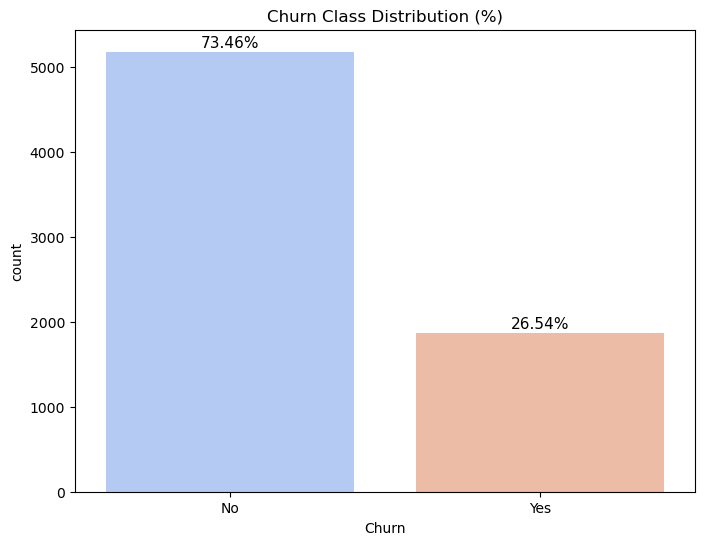

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Class Distribution (%)")
for i, p in enumerate(class_counts):
    plt.text(i, p + 50, f"{class_percentage[i]:.2f}%", ha='center', fontsize=11)
plt.savefig('../reports/figures/churn_distribution.png', dpi=200, bbox_inches='tight')
plt.show()


The target variable `Churn` is **imbalanced**, with approximately **26.5% churned** and **73.5% retained** customers.
This imbalance should be addressed later using class weights or oversampling (e.g., SMOTE) during model training.


### Notes & Findings

- Dataset has 7043 rows and 21 columns.
- Target variable `Churn` is imbalanced (e.g., ~26.54% churners).
- Columns like `TotalCharges` may contain blank or object types requiring conversion.
- No severe duplication issues observed.